In [1]:
import zipfile as zf
files = zf.ZipFile("Brain-Tumor-Classification-DataSet-master.zip", 'r')
files.extractall('archive')
files.close()

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_tumor\image(1).jpg
archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_tumor\image(10).jpg
archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_tumor\image(100).jpg
archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_tumor\image(11).jpg
archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_tumor\image(12).jpg
archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_tumor\image(13).jpg
archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_tumor\image(14).jpg
archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_tumor\image(15).jpg
archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_tumor\image(16).jpg
archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_tumor\image(17).jpg
archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_tumor\image(18).jpg
archive\Brain-Tumor-Classification-DataSet-master\Testing\glioma_

# IMPORTING REQUIRED PACKAGES

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [5]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

# Creating LABELS

In [6]:
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

In [7]:
labels    #Represents different classes or categories (e.g., tumor types).

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Declaring X_train, Y_train

In [8]:
X_train = []
Y_train = []
image_size = 150

# Adding the images and Labels to X_train and Y_train

In [9]:
for i in labels:
    folderPath = os.path.join('archive/Brain-Tumor-Classification-DataSet-master/Training',i)  #Constructs the path to the directory containing images for a specific label (e.g., tumor type).
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))    #Reads an image file from the specified path.
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)   #Appends the resized image to the training data (input features).
        Y_train.append(i)    #Appends the corresponding label (class) to the training labels (target).

In [10]:
for i in labels:
    folderPath = os.path.join('archive/Brain-Tumor-Classification-DataSet-master/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

# Now X_train contains images and Y_train conatins Lables

In [11]:
X_train = np.array(X_train)    #The training data (input features) stored as a Python list is converted to a NumPy array.
Y_train = np.array(Y_train)

In [12]:
type(X_train)

numpy.ndarray

In [13]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)  #shuffle->This function is part of the sklearn.utils module in scikit-learn//It shuffles the data (both input features and target labels) in a consistent way. 
X_train.shape   #you can check the shape of the X_train array using X_train.shape.

(3264, 150, 150, 3)

# Splitting the data

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=42)
#It’s common practice to use well-known values (like 42) or any number you prefer.(random_state=42)//you can use any integer.The key is to use the same value consistently for reproducibility.
#random_state ensures consistent data splits, which is crucial for model evaluation and comparison. 
#If not specify, Without a fixed random_state, each run would result in a different data split, potentially affecting model performance

In [15]:
y_train_new = []      #An empty list to store the transformed class labels.
for i in y_train:        #Represents the original class labels (e.g., tumor types).
    y_train_new.append(labels.index(i))   #Finds the index of the class label i in the labels list.
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)       #Converts the integer class labels to a binary class matrix (one-hot encoding).

In [16]:
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))  
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [17]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))   #The purpose of dropout is to prevent overfitting by randomly dropping out (setting to zero) a fraction of the input units during training.
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))     
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))  #Fully connected(Dense)
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))   #The final layer is a Dense layer with 4 units (since there are 4 classes in the output).
#The activation function used (for multi-class classification
#model has a total of 16 layers (including convolutional, max pooling, dropout, flatten, and dense layers).

In [18]:
model

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [21]:
history = model.fit(X_train,y_train,epochs=15,validation_split=0.1)

Epoch 1/15


74/74 [==============================] - 113s 1s/step - loss: 2.1021 - accuracy: 0.3142 - val_loss: 1.3671 - val_accuracy: 0.2748
Epoch 2/15
74/74 [==============================] - 108s 1s/step - loss: 1.1753 - accuracy: 0.4755 - val_loss: 1.1125 - val_accuracy: 0.5229
Epoch 3/15
74/74 [==============================] - 109s 1s/step - loss: 0.9819 - accuracy: 0.5688 - val_loss: 0.9856 - val_accuracy: 0.5954
Epoch 4/15
74/74 [==============================] - 111s 1s/step - loss: 0.8739 - accuracy: 0.6275 - val_loss: 0.9748 - val_accuracy: 0.5725
Epoch 5/15
74/74 [==============================] - 101s 1s/step - loss: 0.7435 - accuracy: 0.6790 - val_loss: 0.9331 - val_accuracy: 0.5954
Epoch 6/15
74/74 [==============================] - 99s 1s/step - loss: 0.6711 - accuracy: 0.7178 - val_loss: 0.8441 - val_accuracy: 0.6145
Epoch 7/15
74/74 [==============================] - 101s 1s/step - loss: 0.6270 - accuracy: 0.7314 - val_loss: 0.8353 - val_accuracy: 0.6069
Epoch 8/15
7

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Trainig Accuracy vs Validation Accuracy

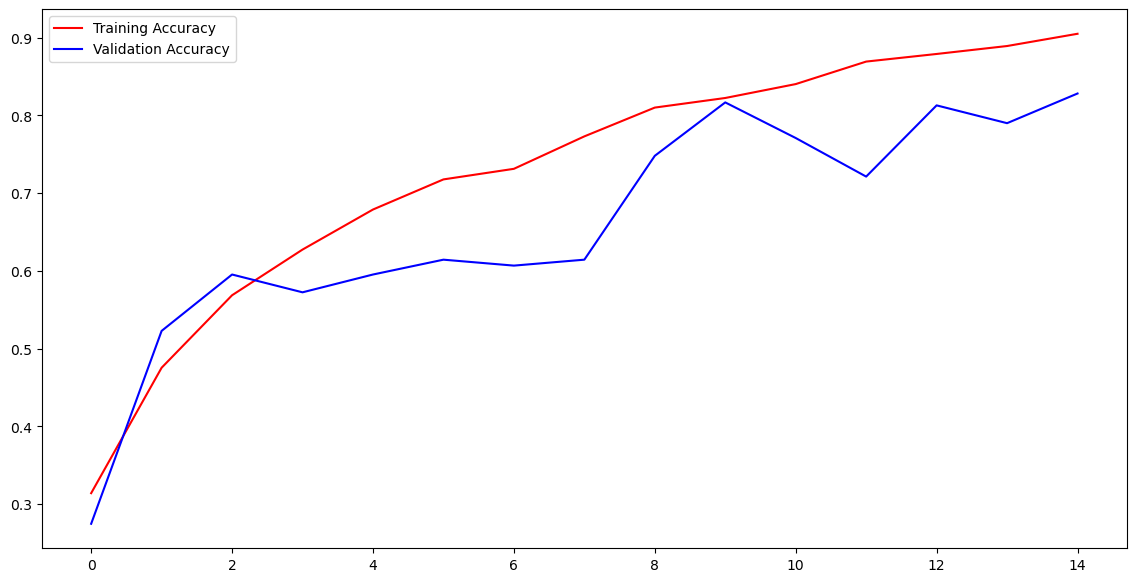

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

# Plotting Trainig Loss vs Validation Loss

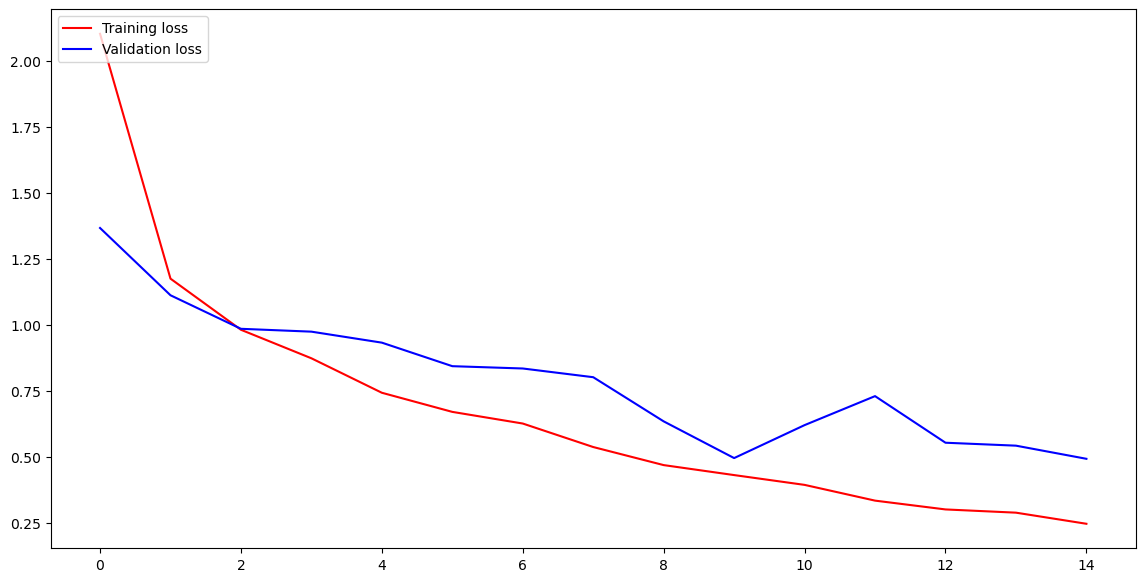

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [71]:
img = cv2.imread('archive/Brain-Tumor-Classification-DataSet-master/Training/no_tumor/4.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [72]:
img_array = img_array.reshape(1,150,150,3)   # a single image with a height and width of 150 pixels each, and 3 color channels (red, green, and blue). 
img_array.shape

(1, 150, 150, 3)

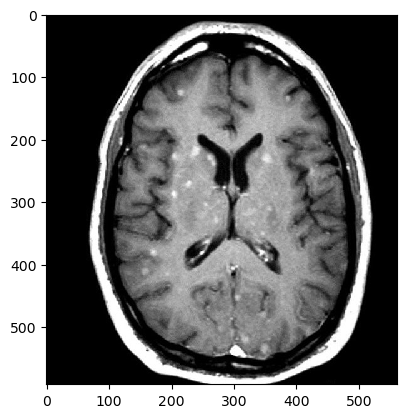

In [73]:
from tensorflow.keras.preprocessing import image
img = image.load_img('archive/Brain-Tumor-Classification-DataSet-master/Training/no_tumor/4.jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

# Prediction Image

In [76]:
a=model.predict(img_array)
indices = a.argmax()
labels[indices]

1/1 [==============================] - 0s 35ms/step


'no_tumor'